# Section I. Research

### Load libraries, functions, palette, theme

In [1]:
import os
from pathlib import Path

In [2]:
# load libraries and palette
%run __libraries.ipynb

In [3]:
# load functions
# from __functions import *
%run __functions.ipynb

In [4]:
# start stopwatch
start = stopwatch_start()

### Variables

In [5]:
dir_current = '01-explore'

In [6]:
dir_save_files = 'files/'

In [7]:
dir_load_files = 'files/'

In [8]:
dir_save_img = 'docs/img/'

### Load Files

In [9]:
datasets = loadit('datasets', path=dir_load_files, create_empty_dict=True)

## Load Data

In [10]:
data_raw = pd.read_csv('data/powerconsumption.csv')

In [11]:
data_raw.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


#### Transform names

In [12]:
data_raw = data_raw.rename(columns={
    'PowerConsumption_Zone1': 'target',
    'PowerConsumption_Zone2': 'target2',
    'PowerConsumption_Zone3': 'target3'
})

In [13]:
data_raw.columns = map(str.lower, data_raw.columns)

#### Date to index

In [14]:
data_raw['datetime'] = pd.to_datetime(data_raw['datetime'])

In [15]:
data_raw = data_raw.set_index('datetime', drop=True).asfreq('10min')

In [16]:
data_raw.index.name = None

In [17]:
data_raw.head()

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target,target2,target3
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


#### Check NaNs

In [18]:
is_nan(data_raw)

No NaN values in DataFrame


#### Check duplicates

In [19]:
data_raw[data_raw.duplicated()]

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target,target2,target3


## Data Split

In [20]:
data_raw.shape

(52416, 8)

In [21]:
train = data_raw.loc['2017-01': '2017-07'].copy()

In [22]:
train = train.asfreq('10min').copy()

In [23]:
valid = data_raw.loc['2017-08'].copy()

In [24]:
valid = valid.asfreq('10min').copy()

In [25]:
test = data_raw.loc['2017-09'].copy()

In [26]:
test = test.asfreq('10min').copy()

In [27]:
train.shape

(30528, 8)

In [28]:
valid.shape

(4464, 8)

In [29]:
test.shape

(4320, 8)

## Explore

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30528 entries, 2017-01-01 00:00:00 to 2017-07-31 23:50:00
Freq: 10min
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature          30528 non-null  float64
 1   humidity             30528 non-null  float64
 2   windspeed            30528 non-null  float64
 3   generaldiffuseflows  30528 non-null  float64
 4   diffuseflows         30528 non-null  float64
 5   target               30528 non-null  float64
 6   target2              30528 non-null  float64
 7   target3              30528 non-null  float64
dtypes: float64(8)
memory usage: 2.1 MB


In [31]:
data_describe(train)

,Type,Count,Unique,NaN,Percentages
temperature,float64,30528,3149,0,0
humidity,float64,30528,4083,0,0
windspeed,float64,30528,218,0,0
generaldiffuseflows,float64,30528,8218,0,0
diffuseflows,float64,30528,8290,0,0
target,float64,30528,15671,0,0
target2,float64,30528,17208,0,0
target3,float64,30528,14540,0,0


In [32]:
train.describe()

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target,target2,target3
count,30528.000000,30528.000000,30528.000000,30528.000000,30528.000000,30528.000000,30528.000000,30528.000000
mean,18.071171,67.991018,1.662093,203.316299,91.490765,32470.435124,19889.194918,19584.349698
std,5.989775,15.743781,2.267561,284.639021,143.587597,7193.424201,4805.968611,6246.978019
min,3.247000,11.340000,0.050000,0.004000,0.033000,13895.696200,8560.081466,9348.387097
25%,13.690000,58.030000,0.075000,0.062000,0.130000,25865.664662,15793.160478,15109.650068
50%,17.100000,69.870000,0.083000,15.005000,13.415000,32759.606560,20067.851110,17683.746670
75%,22.090000,81.500000,4.912000,364.300000,126.500000,37391.584175,23101.380483,24322.749770
max,40.010000,93.100000,4.937000,1163.000000,936.000000,51540.199340,37408.860760,47598.326360


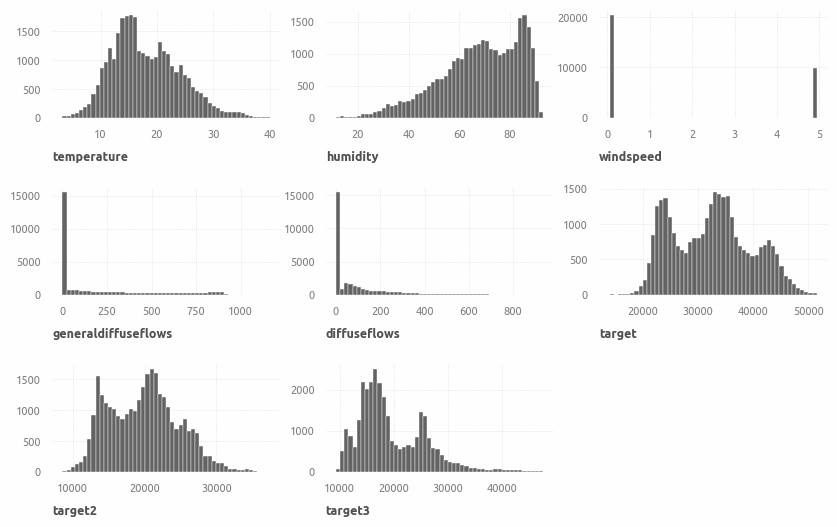

In [33]:
f = plot_gridplot(
    data=train,
    features=train.columns,
    figsize=(10,6),
    ncols=3,
    kind='hist',
    plot_shape='rectangle',
    hscale=1.6,
    histplot_kwargs={'bins': 50})

### Variables lists

In [34]:
target = 'target'

In [35]:
features = [
    'temperature', 'humidity', 'windspeed',
    'generaldiffuseflows', 'diffuseflows'
]

### Datetime features

In [36]:
train['minute'] = train.index.minute
valid['minute'] = valid.index.minute

In [37]:
train['hour'] = train.index.hour
valid['hour'] = valid.index.hour

In [38]:
train['day'] = train.index.day
valid['day'] = valid.index.day

In [39]:
# day numbers since beginning of dataset
train['day_number'] = train.index.day_of_year - train.index.day_of_year.min() + 1
valid['day_number'] = valid.index.day_of_year - valid.index.day_of_year.min() + 1

In [40]:
train['day_of_year'] = train.index.day_of_year
valid['day_of_year'] = valid.index.day_of_year

In [41]:
train['weekday'] = train.index.weekday
valid['weekday'] = valid.index.weekday

In [42]:
train['week'] = train.index.isocalendar().week
train['week'] = train['week'].astype(int)
# train.loc['2017-01-01', 'week'] = 1
valid['week'] = valid.index.isocalendar().week
valid['week'] = valid['week'].astype(int)

In [43]:
train['month'] = train.index.month
valid['month'] = valid.index.month

In [44]:
train["year_month"] = train.index.to_period('M')
# train["year_month"] = train["year_month"].astype(str)
valid["year_month"] = valid.index.to_period('M')

In [45]:
train["year_day"] = train.index.to_period('d')
# train["year_day"] = train["year_day"].astype(str)
valid["year_day"] = valid.index.to_period('d')

In [46]:
train['element_number_daily'] = train.groupby('day_of_year').cumcount() + 1
valid['element_number_daily'] = valid.groupby('day_of_year').cumcount() + 1

In [47]:
train['minute_of_day'] = train.index.map(get_minute_of_day)
valid['minute_of_day'] = valid.index.map(get_minute_of_day)

In [48]:
train

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target,target2,target3,minute,hour,day,day_number,day_of_year,weekday,week,month,year_month,year_day,element_number_daily,minute_of_day
2017-01-01 00:00:00,6.559,73.80,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0,0,1,1,1,6,52,1,2017-01,2017-01-01,1,0
2017-01-01 00:10:00,6.414,74.50,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,10,0,1,1,1,6,52,1,2017-01,2017-01-01,2,10
2017-01-01 00:20:00,6.313,74.50,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,20,0,1,1,1,6,52,1,2017-01,2017-01-01,3,20
2017-01-01 00:30:00,6.121,75.00,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,30,0,1,1,1,6,52,1,2017-01,2017-01-01,4,30
2017-01-01 00:40:00,5.921,75.70,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,40,0,1,1,1,6,52,1,2017-01,2017-01-01,5,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-31 23:10:00,25.100,69.09,4.901,0.084,0.111,43407.30897,29608.86076,34294.89540,10,23,31,212,212,0,31,7,2017-07,2017-07-31,140,1390
2017-07-31 23:20:00,25.150,68.72,4.904,0.099,0.107,42507.90698,28955.69620,33939.41423,20,23,31,212,212,0,31,7,2017-07,2017-07-31,141,1400
2017-07-31 23:30:00,25.220,71.60,4.905,0.080,0.107,41659.53488,28378.48101,33385.10460,30,23,31,212,212,0,31,7,2017-07,2017-07-31,142,1410
2017-07-31 23:40:00,25.100,74.70,4.907,0.080,0.119,40843.05648,28070.88608,32806.69456,40,23,31,212,212,0,31,7,2017-07,2017-07-31,143,1420


In [49]:
months_list = months_list[:len(train['month'].unique())]

In [50]:
months_list

['January', 'February', 'March', 'April', 'May', 'June', 'July']

### Measurements frequencies check

In [51]:
# assert if daily measurements frequencies not equals
assert (train.groupby('day_number').size().sort_values().min() ==
        train.groupby('day_number').size().sort_values().max())

In [52]:
train.groupby('day_number').size()[1]

144

In [53]:
train.groupby('weekday').size()

weekday
0    4464
1    4320
2    4320
3    4320
4    4320
5    4320
6    4464
dtype: int64

In [54]:
4464 - 4320

144

In [55]:
4464/144

31.0

In [56]:
4320/144

30.0

In [57]:
print(train.groupby('week').size())

week
1     1008
2     1008
3     1008
4     1008
5     1008
6     1008
7     1008
8     1008
9     1008
10    1008
11    1008
12    1008
13    1008
14    1008
15    1008
16    1008
17    1008
18    1008
19    1008
20    1008
21    1008
22    1008
23    1008
24    1008
25    1008
26    1008
27    1008
28    1008
29    1008
30    1008
31     144
52     144
dtype: int64


In [58]:
train['week'].unique()

array([52,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [59]:
train.groupby('month').count()['target']

month
1    4464
2    4032
3    4464
4    4320
5    4464
6    4320
7    4464
Name: target, dtype: int64

### Target Variable

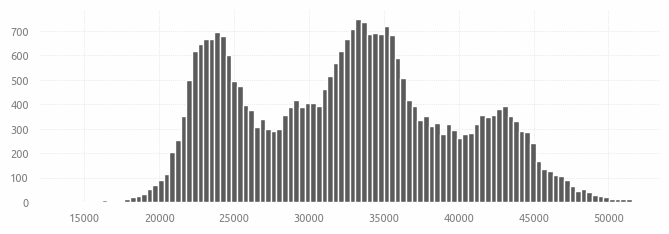

In [60]:
plt.hist(train['target'], bins=100);

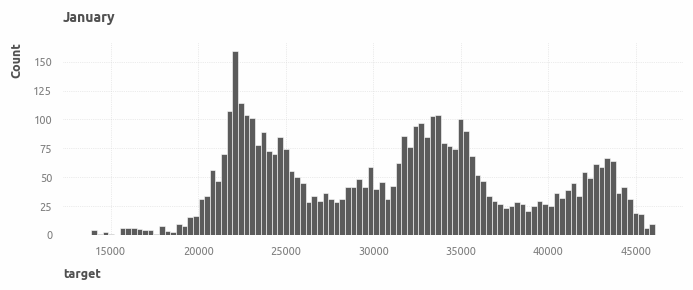

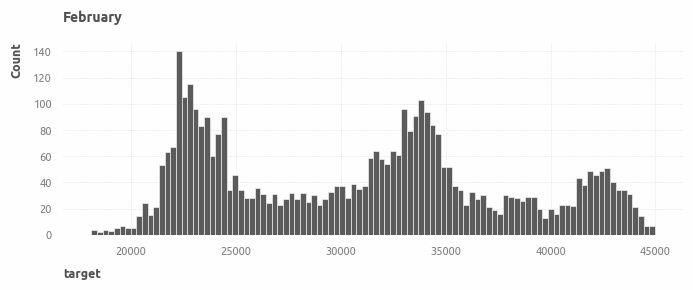

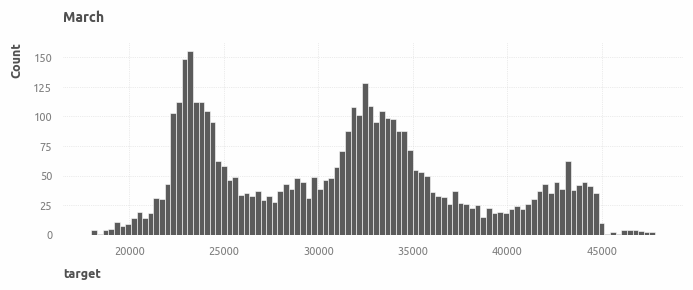

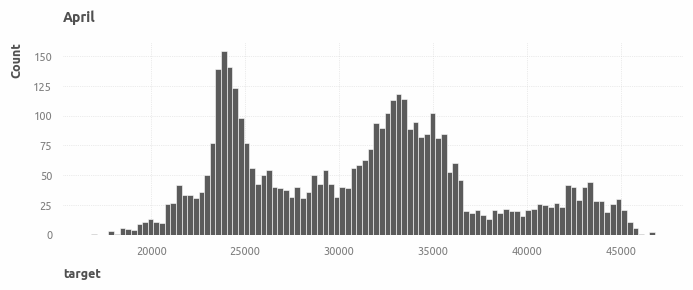

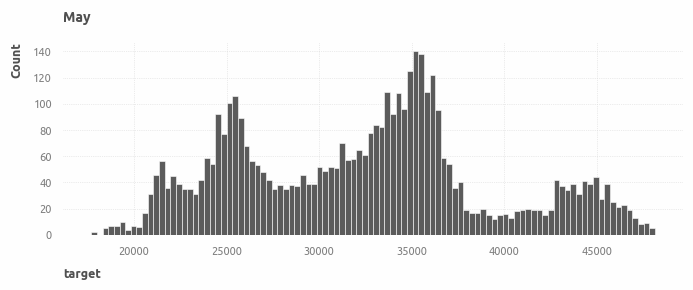

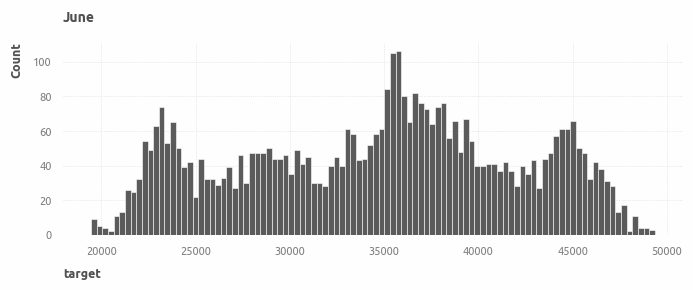

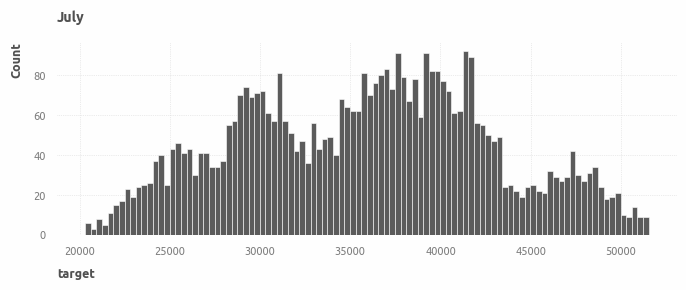

In [61]:
for i, m in zip(train['month'].unique(), months_list):
    sns.histplot(
        data=train[train['month']==i],
        x='target',
        bins=100,
        alpha=1
    );
    plt.title(m)
    plt.show()

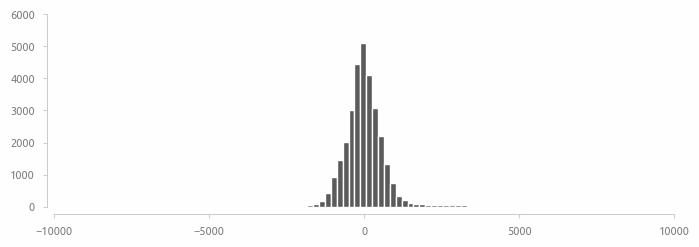

In [62]:
plt.hist(train['target'].diff(1), bins=150);
axis_rstyle(xlim=[-10000, 10000])

In [63]:
train['target'].diff(1).sort_values()

2017-04-20 12:10:00   -19344.67169
2017-01-14 23:10:00    -9211.13925
2017-05-31 11:30:00    -6710.55738
2017-06-05 13:10:00    -6522.91391
2017-06-07 12:30:00    -5823.57616
                          ...     
2017-01-15 12:30:00     5711.39240
2017-04-20 19:10:00     5753.79979
2017-06-17 19:20:00     5849.00662
2017-04-20 12:30:00     9201.11948
2017-01-01 00:00:00            NaN
Name: target, Length: 30528, dtype: float64

## target Visualization

### First look

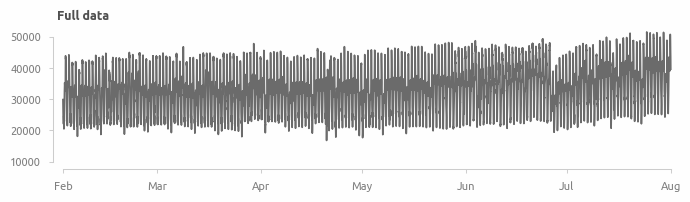

Images 'raw_plot1.png' and 'raw_plot1.svg' successfully saved into 'docs/img/' directory


In [64]:
fig = plt.figure(figsize=(8, 1.75))
ax = ax_current()

ax.plot(train.loc['2017-02':, target], alpha=0.9)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))
axis_rstyle(
    offset_bottom=5, offset_left=2.5, yticks=[10000, 50000, 10000], grid=False)
ax.set_title('Full data', size=9, pad=5)
plt.show()

savefig('raw_plot1', dir_save_img, figure=fig)

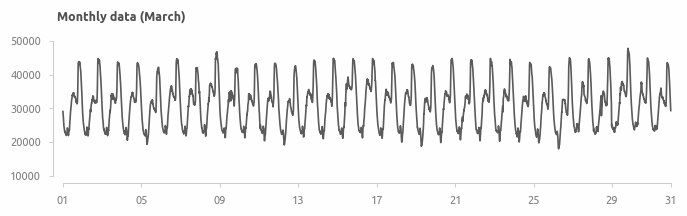

Images 'raw_plot2.png' and 'raw_plot2.svg' successfully saved into 'docs/img/' directory


In [65]:
fig = plt.figure(figsize=(8, 1.75))
ax = ax_current()

ax.plot(train.loc['2017-03', target], alpha=1)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d'))
axis_rstyle(
    offset_bottom=5, offset_left=2.5, yticks=[10000, 50000, 10000], grid=False)
ax.set_title('Monthly data (March)', size=9)
ticklabels_f_modify(-1, '31')
plt.show()

savefig('raw_plot2', dir_save_img, figure=fig)

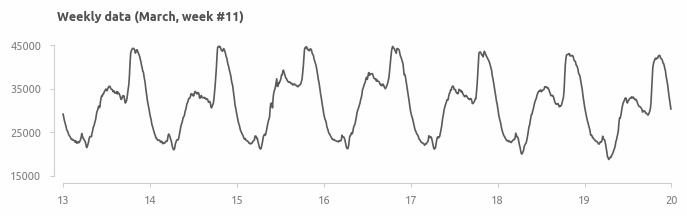

Images 'raw_plot3.png' and 'raw_plot3.svg' successfully saved into 'docs/img/' directory


In [66]:
fig = plt.figure(figsize=(8, 1.75))
ax = ax_current()

ax.plot(train.loc[train['week']==train.loc['2017-03', 'week'].unique()[2], target], alpha=1)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d'))
axis_rstyle(
    offset_bottom=5, offset_left=2.5, yticks=[15000, 45000, 10000], grid=False)
ax.set_title('Weekly data (March, week #11)', size=9)

plt.show()

savefig('raw_plot3', dir_save_img, figure=fig)

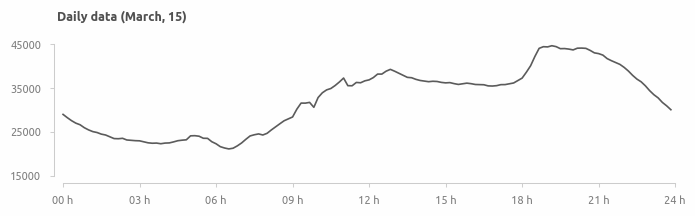

Images 'raw_plot4.png' and 'raw_plot4.svg' successfully saved into 'docs/img/' directory


In [67]:
fig = plt.figure(figsize=(8, 1.75))
ax = ax_current()

ax.plot(train.loc['2017-03-15', target], alpha=1)
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%H h'))
ticklabels_f_modify(-1, '24 h')
axis_rstyle(
    offset_bottom=5, offset_left=2.5, yticks=[15000, 45000, 10000], grid=False)
ax.set_title('Daily data (March, 15)', size=9)

plt.show()

savefig('raw_plot4', dir_save_img, figure=fig)

### Full Distance with Monthly mean

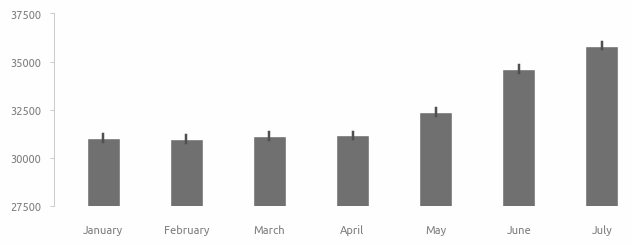

In [68]:
fig = plt.figure(figsize=(7, 2.5))

sns.barplot(
    data=train,
    x='month',
    y='target',
    errorbar=('ci'),
    width=0.4,
    color=palette[-3],
    err_kws=dict(color=palette[-4])
);
plt.xticks(arange(len(months_list)), months_list)
axis_rstyle(
    offset_bottom=10, offset_left=20,
    ylim=[27500, 37500], yticks=[27500, 37500, 2500])
axis_adjust_barplot(line_hidden=True)

plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Full Distance with Weekly mean

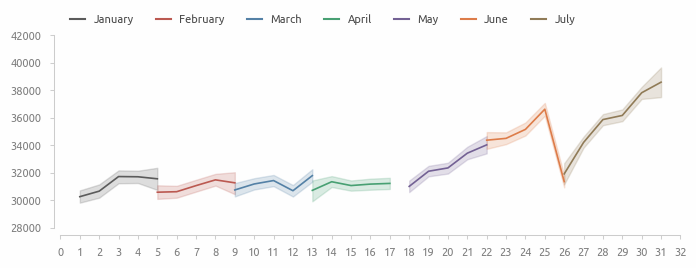

In [69]:
sns.lineplot(
    data=train[train['week'] != 52],
    x='week',
    y='target',
    hue='month',
    errorbar=('ci'),
    palette=palette[:7]
);
maxnloc = mpl.ticker.MaxNLocator(nbins=len(train['week'].unique())+1, integer=True)
ax_current().xaxis.set_major_locator(maxnloc)
axis_rstyle(xslice=[1, -1], grid=False)
plt.legend(**legend_inline(), **legend_create_handles(labels=months_list))

plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Full Distance with Daily mean

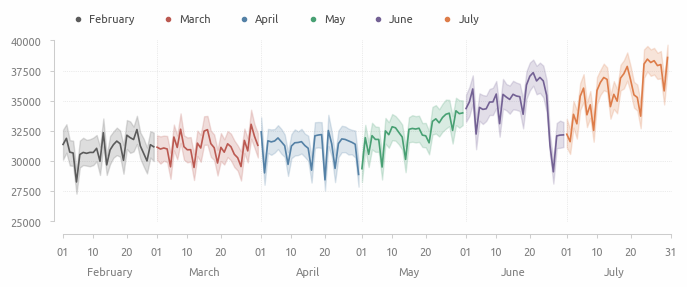

Images 'full_data_lineplot.png' and 'full_data_lineplot.svg' successfully saved into 'docs/img/' directory


In [70]:
fig = plt.figure()

sns.lineplot(
    data=train.loc['2017-02-01':],
    x=train.loc['2017-02-01':].index.to_period('d').to_timestamp(),
    y='target',
    hue='month',
    palette=palette[:6])

axis_rstyle(
    offset_left=2.5, offset_bottom=5, yticks=[25000, 40000, 2500], grid=True)

ax = ax_current()
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%d'))
ax.xaxis.set_major_locator(mpl.dates.DayLocator(bymonthday=[1, 10, 20], interval=1))
ticklabels_f_modify(-1, '31')

ax1 = ax.secondary_xaxis('bottom')
ax1.spines['bottom'].set_position(('outward', 20))
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom=False, labelcolor='#808080')
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%B'))
ax1.xaxis.set_major_locator(mpl.dates.DayLocator(bymonthday=15))

plt.legend(
    **legend_inline(),
    **legend_create_handles(
        kind='p', labels=months_list[1:7]))
plt.xlabel(None)
plt.ylabel(None)

plt.show()

savefig('full_data_lineplot', dir_save_img, figure=fig)

### By Months with Daily mean

#### March

In [71]:
len(train[train['month']==3].index.floor('D').unique())

31

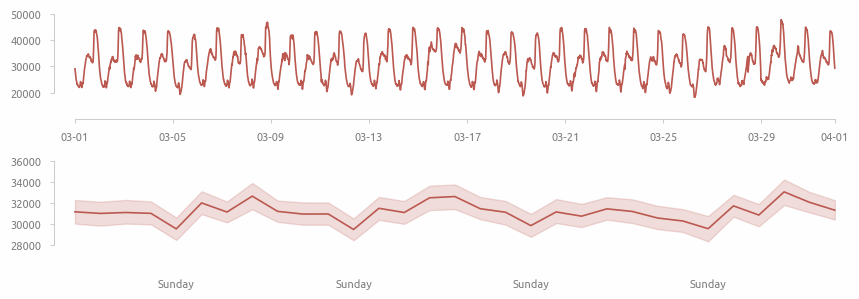

Images 'march_data.png' and 'march_data.svg' successfully saved into 'docs/img/' directory


In [72]:
fig, ax = plt.subplots(2,1, figsize=(10, 3), sharex=False)

# plt.subplot(2, 1, 1)
ax[0].plot(train[train['month']==3].index,
    train[train['month']==3]['target'],
    color=palette[1]);
ax[0].xaxis.set_major_formatter(mpl.dates.DateFormatter('%m-%d'))

axis_rstyle(
    offset_bottom=15, offset_left=10,
    yticks=[20000, 50000, 10000], ylim=[18000, 50000],
    grid=False, ax=ax[0])
    
sns.lineplot(
    data=train[train['month']==3],
    x='day',
    y='target',
    color=palette[1],
    ax=ax[1]);

ax[1].set_xticks(arange(5, 30, 7, True), labels=['Sunday']*4)
ax[1].set_xticks(arange(5, 30, 7, True))

axis_rstyle(
    ax=ax[1], offset_bottom=15, offset_left=10, 
    yticks=[28000, 36000, 2000], ylim=[28000, 36000],
    grid=False, x_axis_hide=True)

plt.xlabel(None)
plt.ylabel(None)

plt.subplots_adjust(hspace=0.75)
plt.show()

savefig('march_data', dir_save_img, figure=fig)

#### April

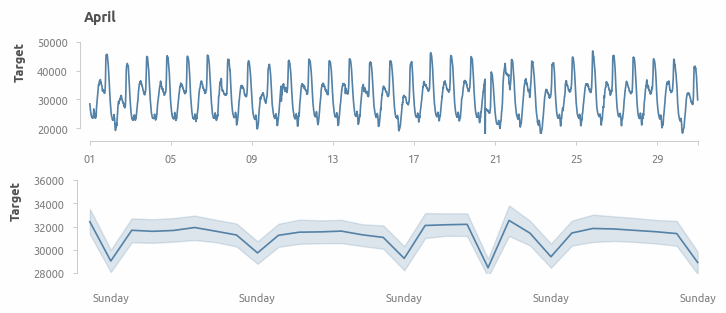

Images 'april_data.png' and 'april_data.svg' successfully saved into 'docs/img/' directory


In [73]:
fig, ax = plt.subplots(2,1, figsize=(8, 3), sharex=False)

ax[0].plot(train[train['month']==4].index,
    train[train['month']==4]['target'],
    color=palette[2])

fmt = mpl.dates.DateFormatter('%d')
ax[0].xaxis.set_major_formatter(fmt)

axis_rstyle(
    offset_bottom=5, offset_left=2.5,
    yticks=[20000, 50000, 10000], ylim=[18000, 50000],
    grid=False, ax=ax[0])

ax[0].xaxis.get_major_ticks()[-1].label1.set_visible(False)
    
sns.lineplot(
    data=train[train['month']==4],
    x='day',
    y='target',
    color=palette[2],
    ax=ax[1])

ax[1].set_xticks(arange(2, 30, 7, True), labels=['Sunday']*5)
ax[1].set_xticks(arange(2, 30, 7, True))

axis_rstyle(
    ax=ax[1], offset_bottom=5, offset_left=5, 
    yticks=[28000, 36000, 2000], ylim=[28000, 36000],
    grid=False, x_axis_hide=True)

# ax[1].tick_params(axis='x', labelsize=9)

plt.xlabel(None)
ax[0].set_ylabel('Target')
ax[1].set_ylabel('Target')
ax[0].set_title('April')

plt.subplots_adjust(hspace=0.5)
plt.show()

savefig('april_data', dir_save_img, figure=fig)

#### May

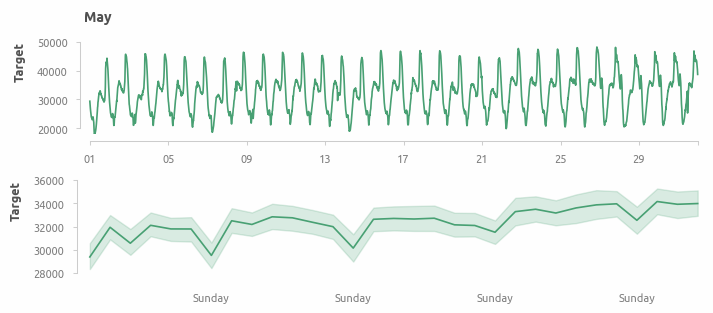

Images 'may_data.png' and 'may_data.svg' successfully saved into 'docs/img/' directory


In [74]:
fig, ax = plt.subplots(2,1, figsize=(8, 3), sharex=False)

# plt.subplot(2, 1, 1)
ax[0].plot(train[train['month']==5].index,
    train[train['month']==5]['target'],
    color=palette[3]
);
fmt = mpl.dates.DateFormatter('%d')
ax[0].xaxis.set_major_formatter(fmt)

axis_rstyle(
    offset_bottom=5, offset_left=2.5,
    yticks=[20000, 50000, 10000], ylim=[18000, 50000],
    grid=False, ax=ax[0]
)
ax[0].xaxis.get_major_ticks()[-1].label1.set_visible(False)
    
sns.lineplot(
    data=train[train['month']==5],
    x='day',
    y='target',
    color=palette[3],
    ax=ax[1])

multloc = mpl.ticker.MultipleLocator(base=7, offset=0)
ax[1].xaxis.set_major_locator(multloc)
ax[1].set_xticks(arange(7, 31, 7, True), labels=['Sunday']*4)

axis_rstyle(
    ax=ax[1], offset_bottom=5, offset_left=5, 
    yticks=[28000, 36000, 2000], ylim=[28000, 36000],
    grid=False, x_axis_hide=True)

# ax[1].tick_params(axis='x', labelsize=9)

plt.xlabel(None)
ax[0].set_ylabel('Target')
ax[1].set_ylabel('Target')
ax[0].set_title('May')

plt.subplots_adjust(hspace=0.5)
plt.show()

savefig('may_data', dir_save_img, figure=fig)

#### June

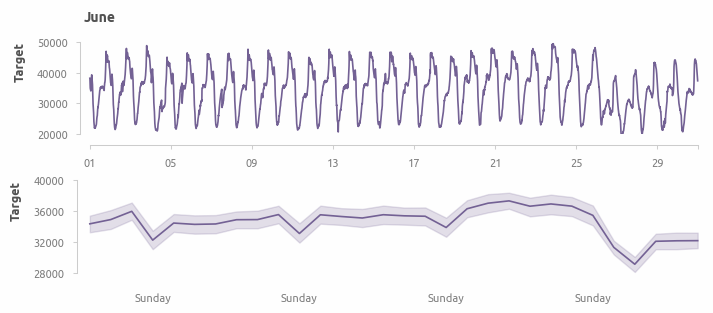

Images 'june_data.png' and 'june_data.svg' successfully saved into 'docs/img/' directory


In [75]:
fig, ax = plt.subplots(2,1, figsize=(8, 3), sharex=False)

# plt.subplot(2, 1, 1)
ax[0].plot(train[train['month']==6].index,
    train[train['month']==6]['target'],
    color=palette[4])

fmt = mpl.dates.DateFormatter('%d')
ax[0].xaxis.set_major_formatter(fmt)

axis_rstyle(
    offset_bottom=7.5, offset_left=2.5,
    yticks=[20000, 50000, 10000], ylim=[20000, 50000],
    grid=False, ax=ax[0])

ax[0].xaxis.get_major_ticks()[-1].label1.set_visible(False)
    
sns.lineplot(
    data=train[train['month']==6],
    x='day',
    y='target',
    color=palette[4],
    ax=ax[1])

multloc = mpl.ticker.MultipleLocator(base=7, offset=0)
ax[1].xaxis.set_major_locator(multloc)
ax[1].set_xticks(arange(4, 30, 7, True), labels=['Sunday']*4)

axis_rstyle(
    ax=ax[1], offset_bottom=5, offset_left=5, 
    yticks=[28000, 40000, 4000], ylim=[28000, 40000],
    grid=False, x_axis_hide=True)

# ax[1].tick_params(axis='x', labelsize=9)

plt.xlabel(None)
ax[0].set_ylabel('Target')
ax[1].set_ylabel('Target')
ax[0].set_title('June')

plt.subplots_adjust(hspace=0.5)
plt.show()

savefig('june_data', dir_save_img, figure=fig)

#### July

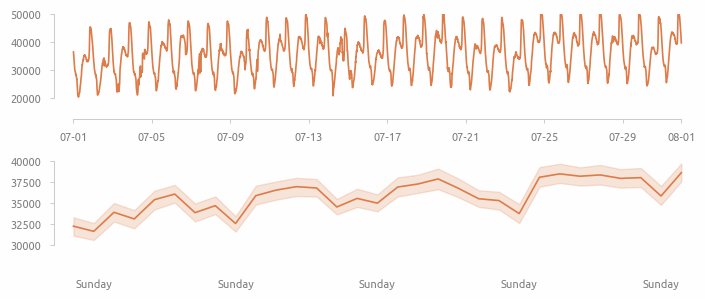

In [76]:
fig, ax = plt.subplots(2,1, figsize=(8, 3), sharex=False)

# plt.subplot(2, 1, 1)
ax[0].plot(train[train['month']==7].index,
    train[train['month']==7]['target'],
    color=palette[5]
);
fmt = mpl.dates.DateFormatter('%m-%d')
ax[0].xaxis.set_major_formatter(fmt)

axis_rstyle(
    offset_bottom=15, offset_left=10,
    yticks=[20000, 50000, 10000], ylim=[20000, 50000],
    grid=False, ax=ax[0]
)

sns.lineplot(
    data=train[train['month']==7],
    x='day',
    y='target',
    color=palette[5],
    ax=ax[1]
);
multloc = mpl.ticker.MultipleLocator(base=7, offset=0)
ax[1].xaxis.set_major_locator(multloc)
ax[1].set_xticks(arange(2, 30, 7, True), labels=['Sunday']*5)

axis_rstyle(
    ax=ax[1], offset_bottom=15, offset_left=10, 
    yticks=[30000, 40000, 2500], ylim=[30000, 40000],
    grid=False, x_axis_hide=True
)

plt.xlabel(None)
plt.ylabel(None)

plt.subplots_adjust(hspace=0.75)
plt.show()

### Weekdays mean

Create additional features: is_Friday and is_Sunday

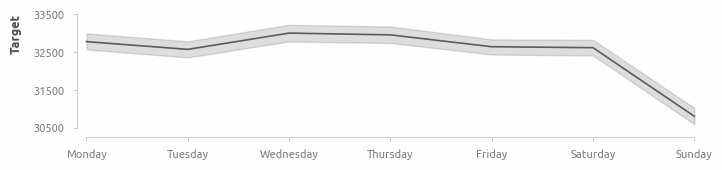

Images 'weekdays_data.png' and 'weekdays_data.svg' successfully saved into 'docs/img/' directory


In [77]:
fig = plt.figure(figsize=(8, 1.5))

sns.lineplot(
    x=train['weekday'],
    y=train['target']
);
axis_rstyle(
    xslice=[1,-1], yticks=[30500, 33500], offset_bottom=5, offset_left=2.5, grid=False)
ax_current().set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xlabel(None)
plt.ylabel('Target')
plt.show()

savefig('weekdays_data', dir_save_img, figure=fig)

In [78]:
data_sund = train.loc[train['weekday']==6].copy()

In [79]:
data_sund = data_sund.groupby(['hour', 'minute']).mean()[target]

In [80]:
data_sund.index = train.loc['2017-07-01'].index

In [81]:
data_nosund = train.loc[train['weekday']!=6].copy()

In [82]:
data_nosund = data_nosund.groupby(['hour', 'minute']).mean()[target]

In [83]:
data_nosund.index = train.loc['2017-07-01'].index

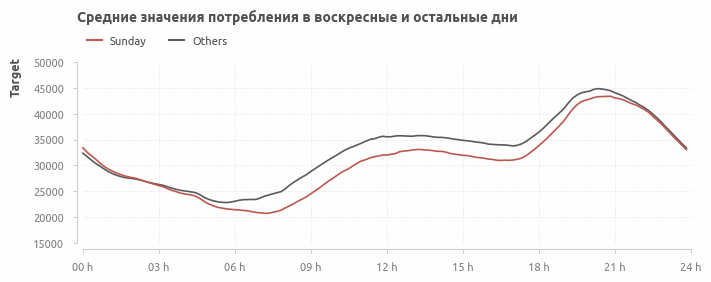

Images 'sundays_data.png' and 'sundays_data.svg' successfully saved into 'docs/img/' directory


In [84]:
fig = plt.figure()

plt.plot(data_nosund, color=palette[0])
plt.plot(data_sund, color=palette[1])
ax = ax_current()

axis_rstyle(offset_left=0, offset_bottom=0, grid=True)
plt.legend(
    **legend_inline(),
    **legend_create_handles(
        2, labels=['Sunday', 'Others'],
        colors=[palette[1], palette[0]]))

axis_formatter_locator('%H h')
ticklabels_f_modify(-1, '24 h')
plt.ylabel('Target')
plt.title('Средние значения потребления в воскресные и остальные дни', **title_inline)

plt.show()

savefig('sundays_data', dir_save_img, figure=fig)

In [85]:
weekdays = np.sort(train['weekday'].unique())

In [86]:
ncols = 2
nrows = math.ceil(len(weekdays)/ncols)

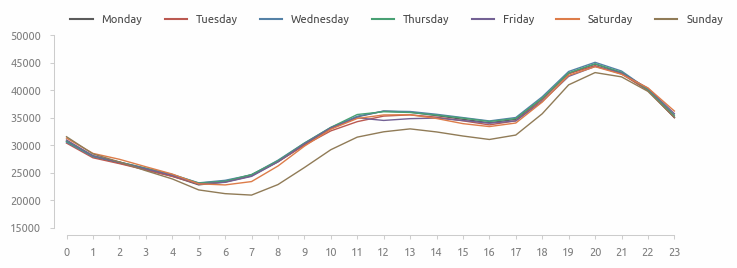

In [87]:
fig = plt.figure()
for i, v in enumerate(weekdays):
    plt.plot(
        train[train['weekday']==v].groupby('hour').mean().index,
        train[train['weekday']==v].groupby('hour').mean()['target'],
        color=palette[v], lw=1, label=weekday_names_dict[v]
    )
leg = plt.legend(**legend_inline())
for l in leg.legend_handles:
    l.set_linewidth(1.5)
axis_rstyle(xticks=[0, 23, 1])

# savefig('data_by_hours', dir_save_img, figure=fig)

### Days mean

- Create additional feature: is_31  
- Anomaly suspect near 2017-06-25

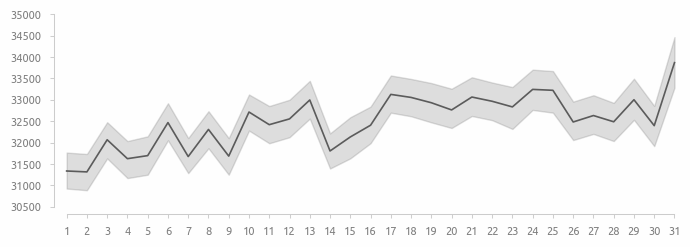

In [88]:
sns.lineplot(
    x=train['day'],
    y=train['target'],
    )
plt.xticks(train.groupby('day').mean().index)
plt.xlabel(None)
plt.ylabel(None)
axis_rstyle()

plt.show()

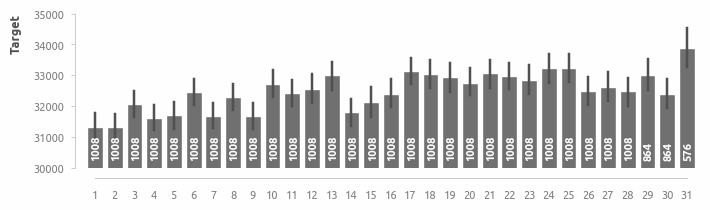

Images 'data_by_days.png' and 'data_by_days.svg' successfully saved into 'docs/img/' directory


In [89]:
fig = plt.figure(figsize=(8, 2))

sns.barplot(
    data=train,
    x='day',
    y='target',
    color=palette[-3],
    err_kws={'color': palette[-4]}
)
ax = plt.gca()
ax.set_ylim(30000, 35000)
ax.set_xlabel(None)
ax.set_ylabel(None)

els_count = train.groupby('day').count().iloc[:, 0]
for bar, count in zip(ax.patches, els_count):
    ax.text(
        bar.get_x()+bar.get_width()/1.75, 30250, count,
        size=8,  color='#FEFEFE', weight='bold',
        ha='center', va='bottom', rotation=90) 

axis_rstyle(offset_left=4, offset_bottom=7.5, grid=False)
ax.tick_params(bottom=False, pad=5)
ax.set_ylabel('Target')
plt.show()

savefig('data_by_days', dir_save_img, figure=fig)

#### Daily

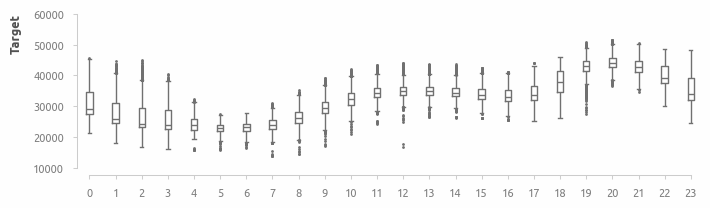

Images 'data_daily.png' and 'data_daily.svg' successfully saved into 'docs/img/' directory


In [90]:
fig, ax = plt.subplots(1, 1, figsize=(8, 2))

sns.boxplot(
    y=train['target'],
    x=train['hour'],
    width=0.25,
    fill=False,
    linewidth=1,
    color=palette[-3],
    flierprops=dict(markersize=1),
    ax=ax
)
axis_rstyle(
    offset_bottom=5, offset_left=2.5,
    ax=ax, xticks=[0, 23, 1], yticks=[10000, 60000, 10000],
    grid=False)
ax.set_xlabel(None)
# ax.set_ylabel(None)
ax.set_ylim(10000, 60000)
ax.set_ylabel('Target')

plt.subplots_adjust(hspace=0.35)
plt.show()

savefig('data_daily', dir_save_img, figure=fig)

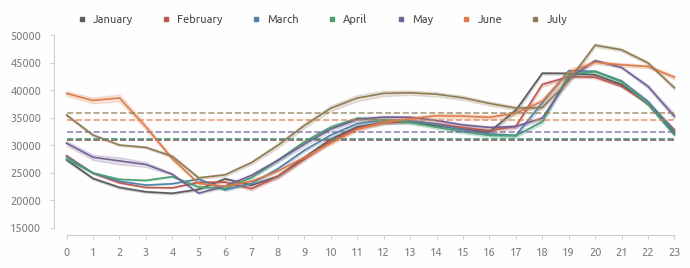

In [91]:
fig = plt.figure()
for i in arange(1, 7, True):
    sns.lineplot(
        x=train.loc[f'2017-{str(i).zfill(2)}']['hour'],
        y=train.loc[f'2017-{str(i).zfill(2)}']['target'],
        color=palette[i-1],
        label=i
    )
    plt.axhline(
        train.loc[f'2017-{str(i).zfill(2)}']['target'].mean(),
        0.01, 0.99, ls='--', alpha=0.75, color=palette[i-1])
    
plt.xticks(range(24))
plt.legend(**legend_create_handles(labels=months_list, kind='s'), **legend_inline())
axis_rstyle()

plt.xlabel(None)
plt.ylabel(None)

plt.show()

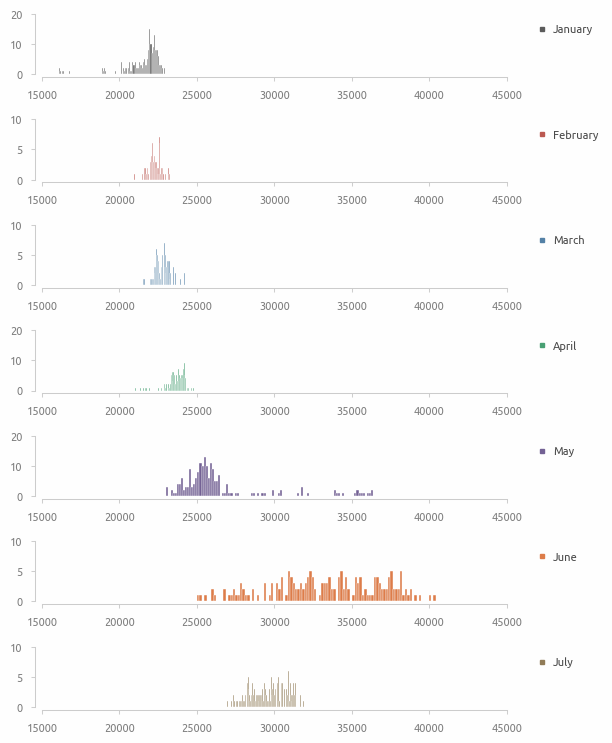

In [92]:
fig = plt.figure(figsize=(6, 9))
for i in arange(6, True):
    plt.subplot(7, 1, i+1)
    sns.histplot(
        x=train[(train['hour']==3) & (train['year_month']==f'2017-0{i+1}')]['target'],
        color=palette[i],
        bins=100,
        label=months_list[i],
        alpha=1
    )
    
    plt.legend(
        **legend_mid(bbox_to_anchor=(1.03, 1)),
        **legend_create_handles(kind='s', colors=[palette[i]]))
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xlim(15000, 45000)
    axis_rstyle(offset_bottom=2)
    plt.subplots_adjust(hspace=0.75)

## Differencing

### 1-lag

In [93]:
train['target_diff'] = train['target'].diff().copy()

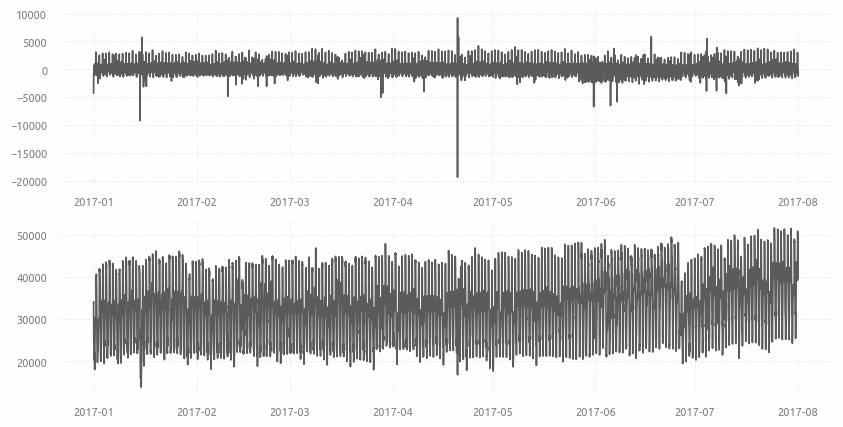

In [94]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(2,1,1)
plt.plot(
    train.index,
    train['target_diff']
);
plt.subplot(2,1,2)
plt.plot(
    train.index,
    train['target']
);

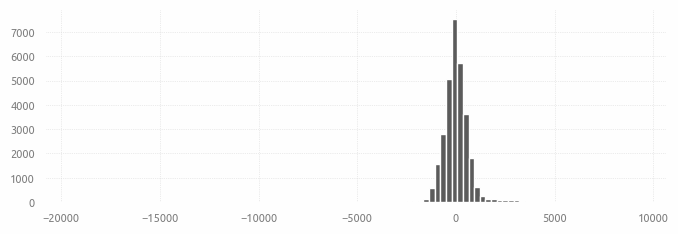

In [95]:
plt.hist(train['target_diff'], bins=100);

In [96]:
train['target_diff'].sort_values().head(10)

2017-04-20 12:10:00   -19344.67169
2017-01-14 23:10:00    -9211.13925
2017-05-31 11:30:00    -6710.55738
2017-06-05 13:10:00    -6522.91391
2017-06-07 12:30:00    -5823.57616
2017-03-28 10:50:00    -5000.17022
2017-02-10 09:10:00    -4850.84746
2017-07-10 09:10:00    -4299.26910
2017-03-28 23:30:00    -4264.85106
2017-01-01 00:10:00    -4241.01266
Name: target_diff, dtype: float64

In [97]:
train['target_diff'].sort_values().tail(10)

2017-07-19 19:40:00    3757.07642
2017-07-07 12:20:00    3916.54485
2017-05-07 19:20:00    4016.26230
2017-04-26 19:10:00    4191.34554
2017-07-04 12:30:00    5504.85050
2017-01-15 12:30:00    5711.39240
2017-04-20 19:10:00    5753.79979
2017-06-17 19:20:00    5849.00662
2017-04-20 12:30:00    9201.11948
2017-01-01 00:00:00           NaN
Name: target_diff, dtype: float64

### Returns

In [98]:
train['target_returns'] = train['target'].pct_change(1).mul(100)

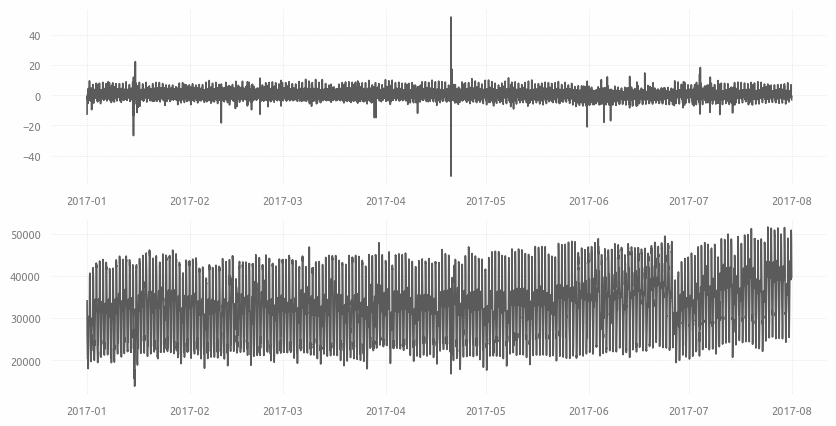

In [99]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(2,1,1)
plt.plot(
    train.index,
    train['target_returns']
);
plt.subplot(2,1,2)
plt.plot(
    train.index,
    train['target']
);

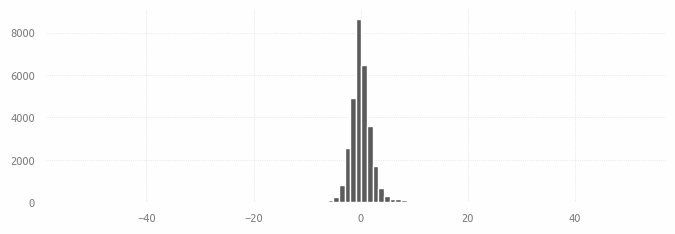

In [100]:
plt.hist(train['target_returns'], bins=100);

In [101]:
train['target_returns'].sort_values().head(10)

2017-04-20 12:10:00   -53.497942
2017-01-14 23:10:00   -26.690141
2017-05-31 11:30:00   -20.951258
2017-02-10 09:10:00   -18.288475
2017-06-05 13:10:00   -17.849687
2017-06-07 12:30:00   -16.844428
2017-03-28 10:50:00   -14.814815
2017-03-28 23:30:00   -14.752014
2017-01-15 00:40:00   -13.570311
2017-07-10 09:10:00   -12.728990
Name: target_returns, dtype: float64

In [102]:
train['target_returns'].sort_values().tail(10)

2017-07-07 12:20:00    11.940879
2017-06-06 12:50:00    12.091097
2017-06-13 06:20:00    12.407862
2017-07-04 07:10:00    13.928672
2017-06-17 19:20:00    14.687101
2017-04-20 19:10:00    17.134417
2017-07-04 12:30:00    18.295527
2017-01-15 12:30:00    22.180274
2017-04-20 12:30:00    51.707317
2017-01-01 00:00:00          NaN
Name: target_returns, dtype: float64

### Volatility

In [103]:
train['target_volatility'] = (train['target'].pct_change(1)**2).copy()

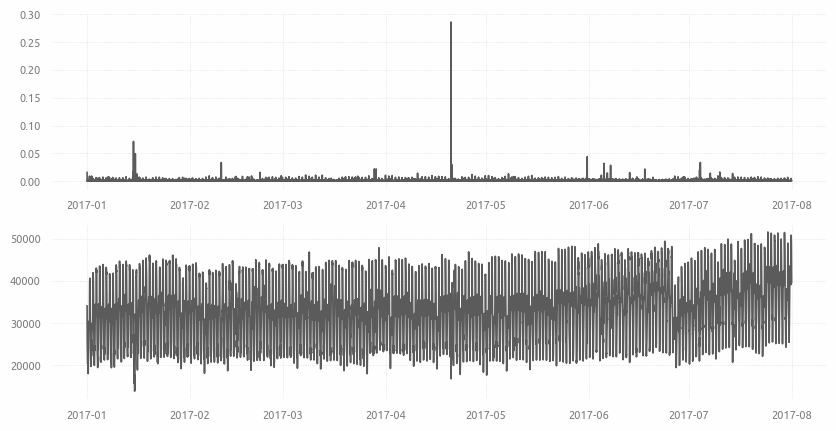

In [104]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(2,1,1)
plt.plot(
    train.index,
    train['target_volatility']
);
plt.subplot(2,1,2)
plt.plot(
    train.index,
    train['target']
);

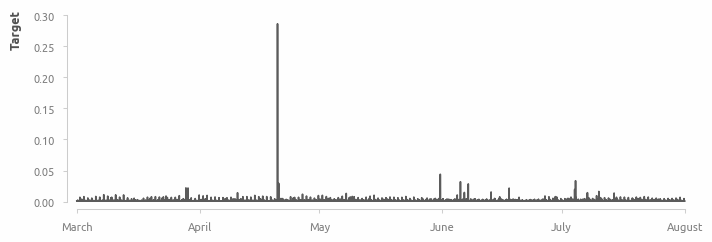

Images 'anomaly_plot.png' and 'anomaly_plot.svg' successfully saved into 'docs/img/' directory


In [105]:
fig = plt.figure(figsize=(8, 2.5))

plt.plot(
    train.loc['2017-03-01':].index,
    train.loc['2017-03-01':, 'target_volatility'])

axis_rstyle(offset_bottom=5, offset_left=2.5, ylim=[0, 0.31])
axis_formatter_locator(mpl.dates.DateFormatter('%B'))
plt.ylabel('Target')
plt.show()

savefig('anomaly_plot', dir_save_img, figure=fig)

## Anomalies

##### Anomaly #1
2017-06-25 : 2017-07-02

- Diff in 'diffuseflows' first looks suspicious, but after detail check the decision is - it's not the reason of animaly.
- Generally, don't looks like an accident. Volatility and returns not extreme. Other targets demonstrates similar behavior over this time preiod.

__Cause__: protests  
https://www.thenation.com/article/archive/is-morocco-headed-toward-insurrection/

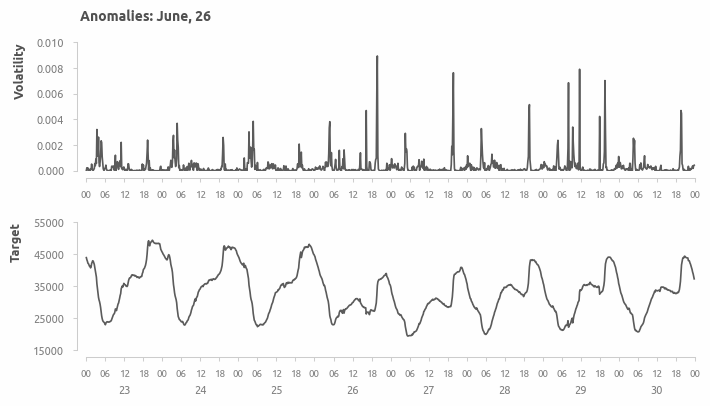

Images 'anomaly1_1.png' and 'anomaly1_1.svg' successfully saved into 'docs/img/' directory


In [106]:
fig, ax = plt.subplots(2, 1, figsize=(8, 4))

ax[0].plot(
    train.loc['2017-06-23':'2017-06-30'].index,
    train.loc['2017-06-23':'2017-06-30']['target_volatility'])

ax[0].xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%H'))
ax[0].xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[0, 6, 12, 18]))
ax[0].tick_params(axis='x', which='major', labelsize=7)

# axis_second = axis_secondary(ax=ax[0])
# axis_second.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%d'))
# axis_second.xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[12]))
# axis_second.tick_params(axis='x', colors='#808080')
axis_rstyle(
    offset_bottom=5, offset_left=2.5,
    xslice=[1, -1], ylim=[0, 0.01], ax=ax[0])

for i, v in enumerate(['target']):
    ax[i+1].plot(
        train.loc['2017-06-23':'2017-06-30'].index,
        train.loc['2017-06-23':'2017-06-30'][v])
    
    ax[i+1].xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%H'))
    ax[i+1].xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[0, 6, 12, 18]))
    ax[i+1].tick_params(axis='x', which='major', labelsize=7)
    
    axis_second = axis_secondary(ax=ax[i+1], pad=25)
    axis_second.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%d'))
    axis_second.xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[12]))
    axis_second.tick_params(axis='x', colors='#808080')
    
    axis_rstyle(
        offset_bottom=5, offset_left=2.5,
        xslice=[1, -1], yticks=[15000, 55000, 10000], ax=ax[i+1])
    
titles = ['Volatility', 'Target']
for ax_, title in zip(ax, titles):
    ax_.set_ylabel(title)

ax[0].set_title('Anomalies: June, 26')
plt.subplots_adjust(hspace=0.4)
plt.show()

savefig('anomaly1_1', dir_save_img, figure=fig)

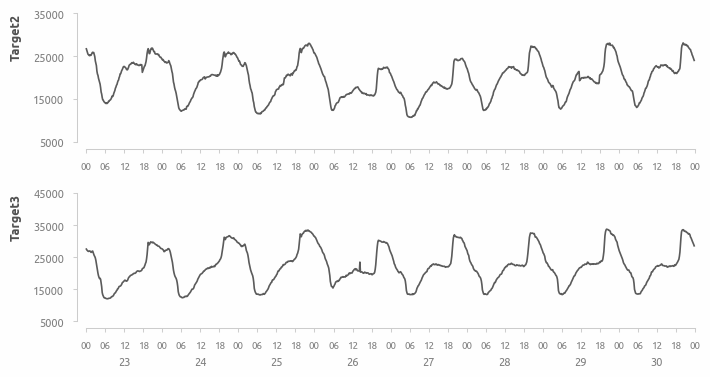

Images 'anomaly1_2.png' and 'anomaly1_2.svg' successfully saved into 'docs/img/' directory


In [107]:
fig, ax = plt.subplots(2, 1, figsize=(8, 4))

for i, v in enumerate(['target2', 'target3']):
    ax[i].plot(
        train.loc['2017-06-23':'2017-06-30'].index,
        train.loc['2017-06-23':'2017-06-30'][v])
    
    ax[i].xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%H'))
    ax[i].xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[0, 6, 12, 18]))
    ax[i].tick_params(axis='x', which='major', labelsize=7)

    if i == 1:
        axis_second = axis_secondary(ax=ax[i], pad=25)
        axis_second.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%d'))
        axis_second.xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[12]))
        axis_second.tick_params(axis='x', colors='#808080')
    
axis_rstyle(
    offset_bottom=5, offset_left=2.5,
    xslice=[1, -1], yticks=[5000, 35000, 10000], ax=ax[0])
axis_rstyle(
    offset_bottom=5, offset_left=2.5,
    xslice=[1, -1], yticks=[5000, 45000, 10000], ax=ax[1])
    
titles = ['Target2', 'Target3']
for ax_, title in zip(ax, titles):
    ax_.set_ylabel(title)

plt.subplots_adjust(hspace=0.4)
plt.show()

savefig('anomaly1_2', dir_save_img, figure=fig)

##### Anomaly #2

index: 2017-04-20 12:10:00  
volatility: 2862.029840

In [108]:
train.loc['2017-04-20'].index.day_name()[0]

'Thursday'

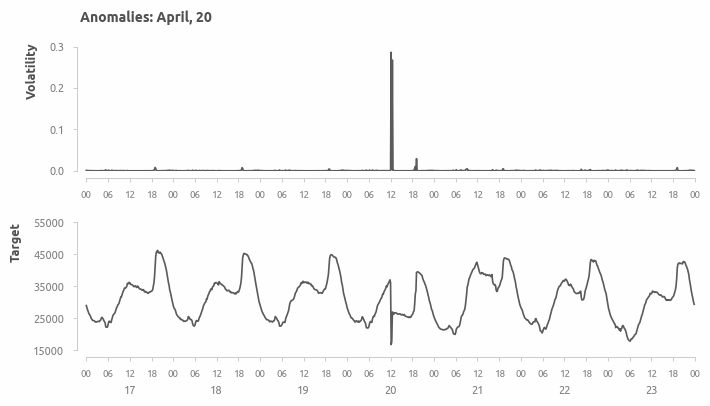

Images 'anomaly2_1.png' and 'anomaly2_1.svg' successfully saved into 'docs/img/' directory


In [109]:
fig, ax = plt.subplots(2, 1, figsize=(8, 4))

ax[0].plot(
    train.loc['2017-04-17':'2017-04-23'].index,
    train.loc['2017-04-17':'2017-04-23']['target_volatility'])

ax[0].xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%H'))
ax[0].xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[0, 6, 12, 18]))
ax[0].tick_params(axis='x', which='major', labelsize=7)

axis_rstyle(
    offset_bottom=5, offset_left=2.5,
    xslice=[1, -1], ylim=[0, 0.31], ax=ax[0])

for i, v in enumerate(['target']):
    ax[i+1].plot(
        train.loc['2017-04-17':'2017-04-23'].index,
        train.loc['2017-04-17':'2017-04-23'][v])

    ax[i+1].xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%H'))
    ax[i+1].xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[0, 6, 12, 18]))
    ax[i+1].tick_params(axis='x', which='major', labelsize=7)
    
    axis_second = axis_secondary(ax=ax[i+1], pad=25)
    axis_second.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%d'))
    axis_second.xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[12]))
    axis_second.tick_params(axis='x', colors='#808080')
    
    axis_rstyle(
        offset_bottom=5, offset_left=2.5,
        xslice=[1, -1], yticks=[15000, 55000, 10000], ax=ax[i+1])

ax[0].set_ylabel('Volatility')
ax[1].set_ylabel('Target')
ax[0].set_title('Anomalies: April, 20')
plt.subplots_adjust(hspace=0.4)
plt.show()

savefig('anomaly2_1', dir_save_img, figure=fig)

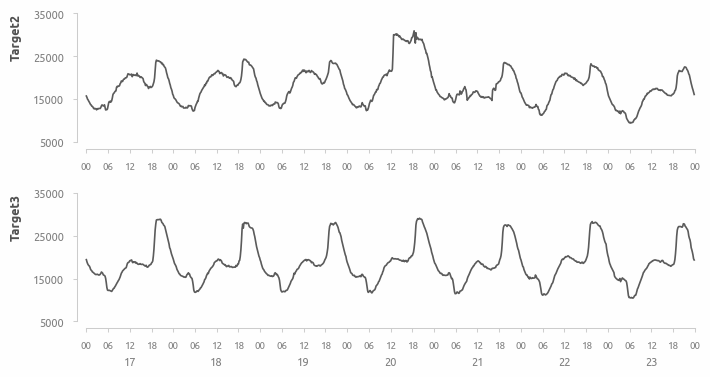

Images 'anomaly2_2.png' and 'anomaly2_2.svg' successfully saved into 'docs/img/' directory


In [110]:
fig, ax = plt.subplots(2, 1, figsize=(8, 4))

for i, v in enumerate(['target2', 'target3']):
    ax[i].plot(
        train.loc['2017-04-17':'2017-04-23'].index,
        train.loc['2017-04-17':'2017-04-23'][v])

    ax[i].xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%H'))
    ax[i].xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[0, 6, 12, 18]))
    ax[i].tick_params(axis='x', which='major', labelsize=7)

    if i == 1:
        axis_second = axis_secondary(ax=ax[i], pad=25)
        axis_second.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%d'))
        axis_second.xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[12]))
        axis_second.tick_params(axis='x', colors='#808080')

    axis_rstyle(
        offset_bottom=5, offset_left=2.5,
        xslice=[1, -1], yticks=[5000, 35000, 10000], ax=ax[i])

titles = ['Target2', 'Target3']
for ax_, title in zip(ax, titles):
    ax_.set_ylabel(title)

plt.subplots_adjust(hspace=0.4)
plt.show()

savefig('anomaly2_2', dir_save_img, figure=fig)

##### Anomaly #3

index: 2017-04-20 12:10:00  
volatility: 2862.029840

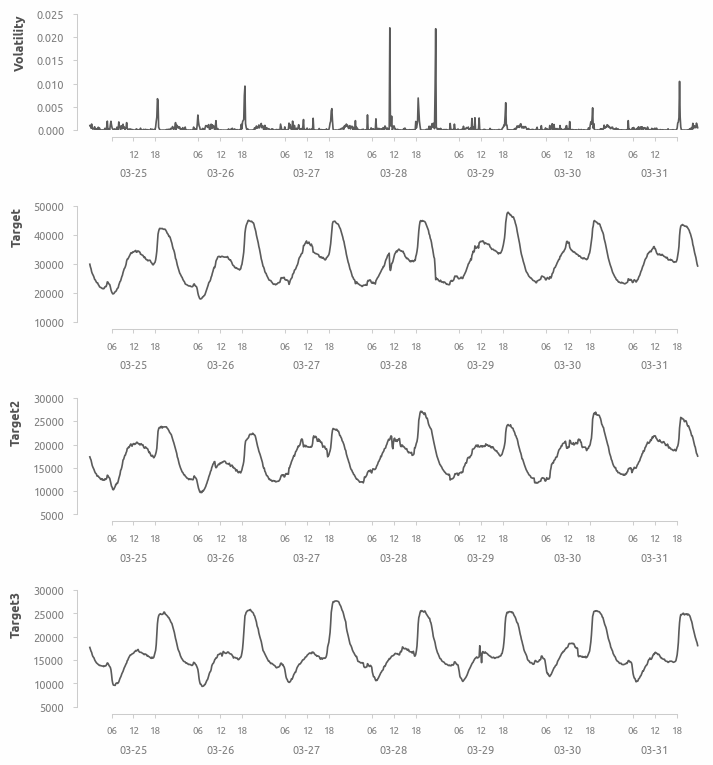

In [111]:
fig, ax = plt.subplots(4,1, figsize=(8, 9))

ax[0].plot(
    train.loc['2017-03-25':'2017-03-31'].index,
    train.loc['2017-03-25':'2017-03-31']['target_volatility'])

ax[0].xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%H'))
ax[0].xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[6, 12, 18]))
ax[0].tick_params(axis='x', which='major', labelsize=7)

axis_second = axis_secondary(ax=ax[0])
axis_second.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%m-%d'))
axis_second.xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[12]))
axis_second.tick_params(axis='x', colors='#808080')

axis_rstyle(xslice=[1, -1], ylim=[0, 0.025], ax=ax[0])

ax[0].xaxis.get_major_ticks()[0].label1.set_visible(False)
ax[0].xaxis.get_major_ticks()[-1].label1.set_visible(False)

for i, v in enumerate(['target', 'target2', 'target3']):
    ax[i+1].plot(
        train.loc['2017-03-25':'2017-03-31'].index,
        train.loc['2017-03-25':'2017-03-31'][v])

    ax[i+1].xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%H'))
    ax[i+1].xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[6, 12, 18]))
    ax[i+1].tick_params(axis='x', which='major', labelsize=7)
    
    axis_second = axis_secondary(ax=ax[i+1])
    axis_second.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%m-%d'))
    axis_second.xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[12]))
    axis_second.tick_params(axis='x', colors='#808080')
    
    axis_rstyle(xslice=[1, -1], ax=ax[i+1])

titles = ['Volatility', 'Target', 'Target2', 'Target3']
for ax_, title in zip(ax, titles):
    ax_.set_ylabel(title)

plt.subplots_adjust(hspace=0.65)
plt.show()

##### Anomaly #4

index: 2017-05-31 11:30:00  
volatility: 438.955206

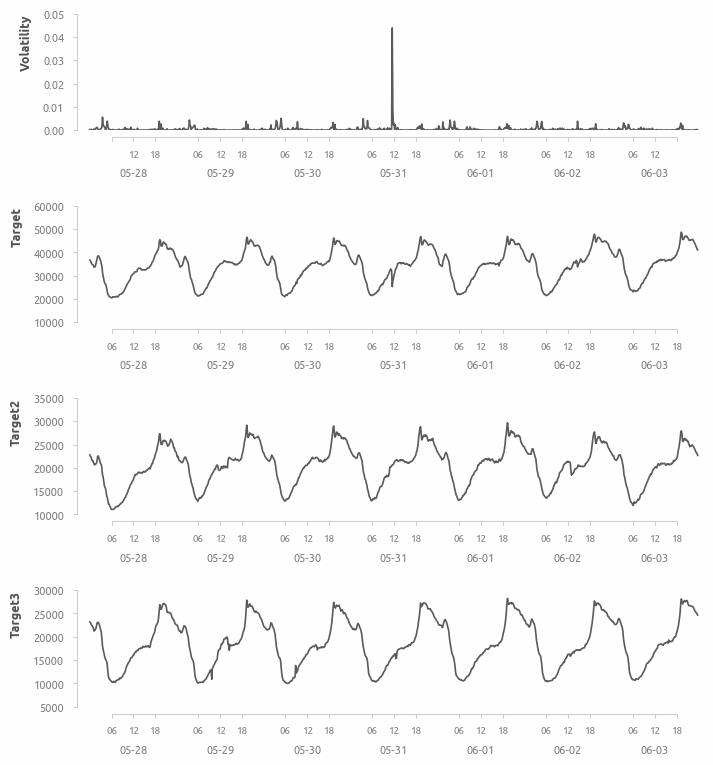

In [112]:
fig, ax = plt.subplots(4,1, figsize=(8, 9))

ax[0].plot(
    train.loc['2017-05-28':'2017-06-03'].index,
    train.loc['2017-05-28':'2017-06-03']['target_volatility']
)

ax[0].xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%H'))
ax[0].xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[6, 12, 18]))
ax[0].tick_params(axis='x', which='major', labelsize=7)

axis_second = axis_secondary(ax=ax[0])
axis_second.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%m-%d'))
axis_second.xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[12]))
axis_second.tick_params(axis='x', colors='#808080')

axis_rstyle(xslice=[1, -1], ylim=[0, 0.05], ax=ax[0])

ax[0].xaxis.get_major_ticks()[0].label1.set_visible(False)
ax[0].xaxis.get_major_ticks()[-1].label1.set_visible(False)

for i, v in enumerate(['target', 'target2', 'target3']):
    ax[i+1].plot(
        train.loc['2017-05-28':'2017-06-03'].index,
        train.loc['2017-05-28':'2017-06-03'][v]
    );

    ax[i+1].xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%H'))
    ax[i+1].xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[6, 12, 18]))
    ax[i+1].tick_params(axis='x', which='major', labelsize=7)
    
    axis_second = axis_secondary(ax=ax[i+1])
    axis_second.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%m-%d'))
    axis_second.xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[12]))
    axis_second.tick_params(axis='x', colors='#808080')
    
    axis_rstyle(xslice=[1, -1], ax=ax[i+1])

titles = ['Volatility', 'Target', 'Target2', 'Target3']
for ax_, title in zip(ax, titles):
    ax_.set_ylabel(title)

plt.subplots_adjust(hspace=0.65)
plt.show()

##### Anomaly #5

index: '2017-06-03':'2017-06-09'

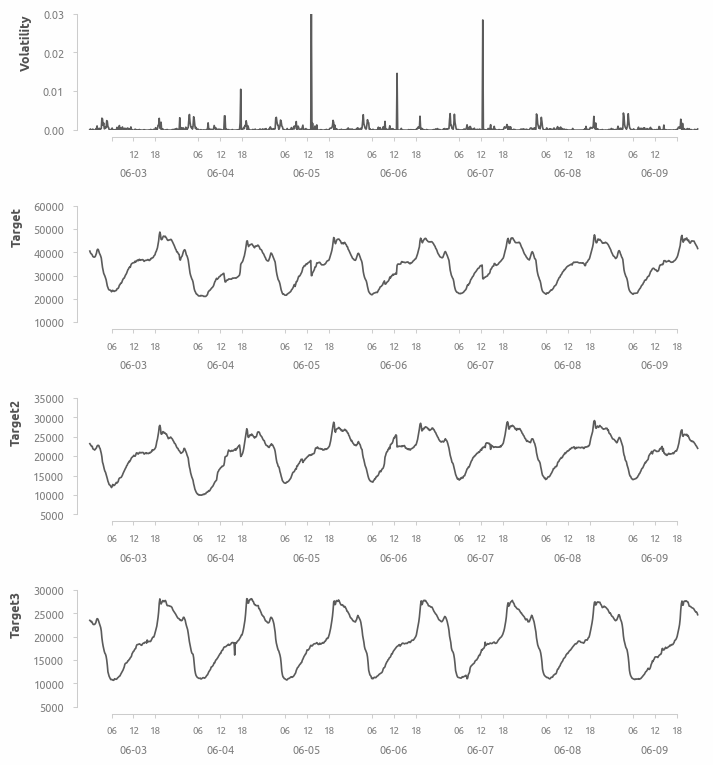

In [113]:
fig, ax = plt.subplots(4,1, figsize=(8, 9))

ax[0].plot(
    train.loc['2017-06-03':'2017-06-09'].index,
    train.loc['2017-06-03':'2017-06-09']['target_volatility']
)

ax[0].xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%H'))
ax[0].xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[6, 12, 18]))
ax[0].tick_params(axis='x', which='major', labelsize=7)

axis_second = axis_secondary(ax=ax[0])
axis_second.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%m-%d'))
axis_second.xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[12]))
axis_second.tick_params(axis='x', colors='#808080')

axis_rstyle(xslice=[1, -1], ylim=[0, 0.03], ax=ax[0])

ax[0].xaxis.get_major_ticks()[0].label1.set_visible(False)
ax[0].xaxis.get_major_ticks()[-1].label1.set_visible(False)

for i, v in enumerate(['target', 'target2', 'target3']):
    ax[i+1].plot(
        train.loc['2017-06-03':'2017-06-09'].index,
        train.loc['2017-06-03':'2017-06-09'][v]
    );

    ax[i+1].xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%H'))
    ax[i+1].xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[6, 12, 18]))
    ax[i+1].tick_params(axis='x', which='major', labelsize=7)
    
    axis_second = axis_secondary(ax=ax[i+1])
    axis_second.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%m-%d'))
    axis_second.xaxis.set_major_locator(mpl.dates.HourLocator(byhour=[12]))
    axis_second.tick_params(axis='x', colors='#808080')
    
    axis_rstyle(xslice=[1, -1], ax=ax[i+1])

titles = ['Volatility', 'Target', 'Target2', 'Target3']
for ax_, title in zip(ax, titles):
    ax_.set_ylabel(title)

plt.subplots_adjust(hspace=0.65)
plt.show()

### Scatterplots Matrix

No non-linear relationships

#### Predictors

### P

xt = (1 + pt)xt−1

In [114]:
train['p'] = train['target'] / train['target'].shift(1) - 1

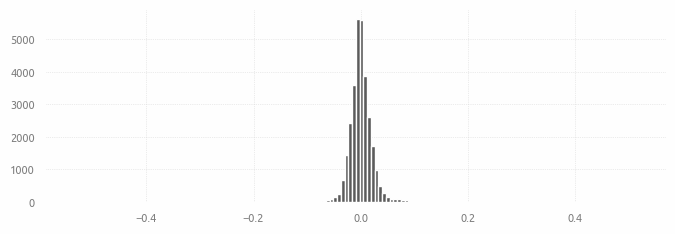

In [115]:
plt.hist(train['p'], bins=150);

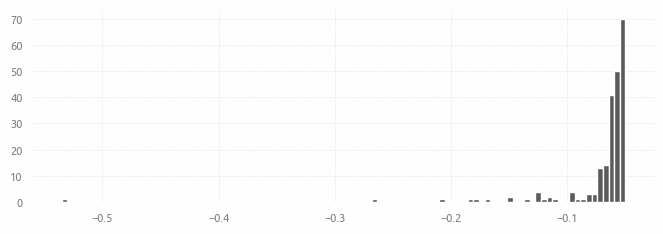

In [116]:
plt.hist(train.loc[train['p']<-0.05, 'p'], bins=100);

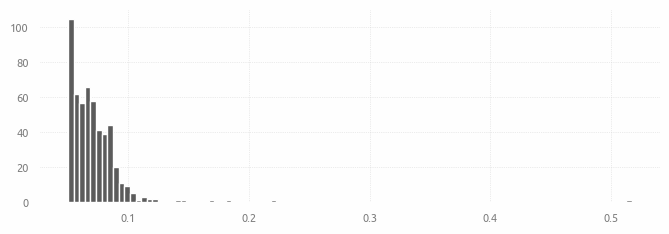

In [117]:
plt.hist(train.loc[train['p']>0.05, 'p'], bins=100);

In [118]:
train['p'].mean()

0.00020962697581172944

## Save Data

In [119]:
datasets['train_raw'] = train
datasets['valid_raw'] = valid
datasets['test_raw'] = test

In [120]:
saveit(datasets, 'datasets', dir_save_files)

File 'datasets.pkl' saved


### Execution time

In [121]:
stopwatch_stop(start)

Execution time: 0:03:35
